In [6]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=80
plt.rcParams['figure.facecolor']='w'
#from scipy.optimize import curve_fit
#from scipy import stats
#from scipy.stats import norm
import math as m
import random as rd
import pandas as pd
from pandas import *

136 - NRLK, TXBY, JBGO, MWSN, NEU3, DOMB, DOMC
NEU3 data available only from 2014

In [54]:
def ind(array, item):
        for idx, val in np.ndenumerate(array):
            if val == item:
                return idx

In [72]:
# Making station-wise functions to plot individual station data

def analyze_OULU(filename, window, plot, plotname, shock, mcstart, mcend, lw):

    #### Reading data from csv
    df = read_csv(filename, delimiter=';',header=None)
    oulu= df[1]
    time = np.array([i for i in range(0,len(df[1]))])
    
    #### Trailing rolling average 
    d = pd.Series(oulu)
    mavg_trail_oulu = d.rolling(window).mean()
    
    ### Arithmetic means of smoothed NM data from beginning to shock arrival to find % deviation from
    avg_oulu_smooth = np.mean(mavg_trail_oulu[:m.floor(shock)])
    
    ### Constructing % mean deviation arrays for each station using average values of smoothed data calculated
    percent_meandevi_oulu    = np.empty(len(mavg_trail_oulu))
    for i in range(0,len(mavg_trail_oulu)):
        percent_meandevi_oulu[i] = ((mavg_trail_oulu[i] - avg_oulu_smooth)/avg_oulu_smooth)*100   
     
    ### Trail-Smoothening out % mean deviation data as well
    d = pd.Series(percent_meandevi_oulu)
    mavg_trail_percent_meandevi_oulu = d.rolling(window).mean()
    
    # Defining predip_avg NM count for smoothed count data
    predip_avg_count_oulu = np.mean(mavg_trail_oulu[:m.floor(shock)])
    
    ## Finding minima of data between shock and MC end time
    localmin_count_oulu = np.min(mavg_trail_oulu[m.floor(shock):m.ceil(mcend+12)])
    
    ## Finding index of minima to plot on graph to verify visually
    minindex_count_oulu = ind(mavg_trail_oulu, localmin_count_oulu)
    
    ## Finding FD magnitude as predip_avg - localmin 
    dipmag_count_oulu = predip_avg_count_oulu - localmin_count_oulu
    
    
    ## Defining predip average NM count as arithmetic mean of data from start to CME shock time
    predip_avg_oulu = np.mean(mavg_trail_percent_meandevi_oulu[:m.floor(shock)])
    
    ## Finding minima of data between shock and MC end time
    localmin_oulu = np.min(mavg_trail_percent_meandevi_oulu[m.floor(shock):m.ceil(mcend+12)])
    
    ## Finding index of minima to plot on graph to verify visually
    minindex_oulu = ind(mavg_trail_percent_meandevi_oulu, localmin_oulu)
    
    ## Finding FD magnitude as predip_avg - localmin 
    dipmag_oulu = predip_avg_oulu - localmin_oulu
    
    if plot == "Smoothed":
        # Plotting
        plt.plot(time, mavg_trail_oulu, linewidth=lw, label= 'OULU-Trail-Smoothed' )
        plt.plot(time, oulu, linewidth=lw, label='OULU-1hr-data' )
        plt.xlabel("Time (hours)")
        plt.ylabel("Counts/s")

         # 3 time stamps
        plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
        plt.axvline(mcstart, color='black', label='MC start')
        plt.axvline(mcend, color='black', linestyle='--', label="MC end")
        
        # 2 average values
        plt.axvline(minindex_count_oulu, color='darkviolet', linestyle='-.', label="Minima")
        plt.axhline(predip_avg_count_oulu, color='violet', linestyle=':', label='Predip Avg')
                
        # Cosmetics
        plt.style.use('seaborn')
        plt.legend(loc=(1,0.70))
        plt.title(plotname)
        plt.show()
        
        # Printing dipmag qtys
        print("Predip_avg = ", predip_avg_count_oulu)
        print("Local minima = ", localmin_count_oulu)
        print("FD magnitude = ", dipmag_count_oulu)
        print("Location of minima = ", minindex_count_oulu)
        
    elif plot == "Percentdev_smooth":
        # Plotting
        plt.plot(time, mavg_trail_percent_meandevi_oulu, linewidth=lw, label='OULU-Trail-Smoothed')
        plt.xlabel("Time (hours)")
        plt.ylabel(f"% mean deviation")
                                
        # 3 time stamps
        plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
        plt.axvline(mcstart, color='black', label='MC start')
        plt.axvline(mcend, color='black', linestyle='--', label="MC end")
            
        # 2 average values
        plt.axvline(minindex_oulu, color='darkviolet', linestyle='-.', label="Minima")
        plt.axhline(predip_avg_oulu, color='violet', linestyle=':', label='Predip Avg')

        # Cosmetics
        plt.style.use('seaborn')
        plt.legend(loc=(1,0.70))
        plt.title(plotname)
        plt.show()       
            
        # Printing dipmag qtys
        print("Predip_avg = ", predip_avg_oulu)
        print("Local minima = ", localmin_oulu)
        print("FD magnitude = ", dipmag_oulu)
        print("Location of minima = ", minindex_oulu)
        
    else:
        print("Error in type of plot")
                    

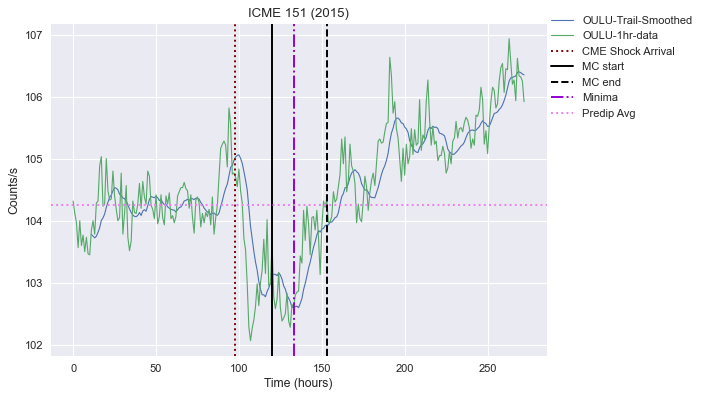

Predip_avg =  104.24952713178298
Local minima =  102.59566666666667
FD magnitude =  1.6538604651163098
Location of minima =  (133,)


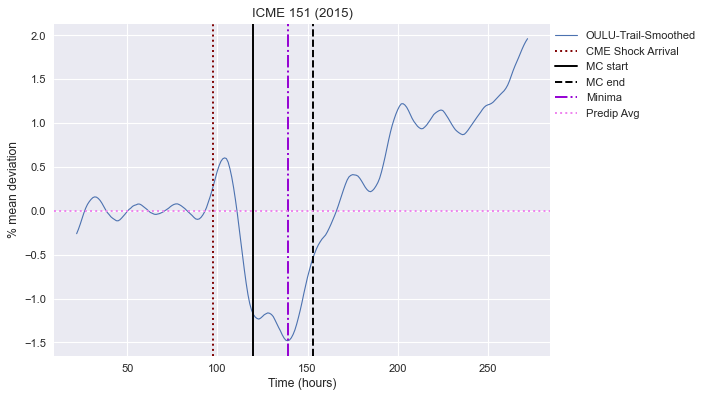

Predip_avg =  0.004314610275326884
Local minima =  -1.4795890918844525
FD magnitude =  1.4839037021597794
Location of minima =  (139,)


In [74]:
analyze_OULU("lowrigall_151.txt", 12, "Smoothed", "ICME 151 (2015)", 97.58, 119.67, 153.03,1)
analyze_OULU("lowrigall_151.txt", 12, "Percentdev_smooth", "ICME 151 (2015)", 97.58, 119.67, 153.03,1)

In [52]:
# Making single function to generate all plots conditionally - 

###### Analyzes data from 14 stations: 
#      OULU    SNAE    APTY    FSMT    INVK    MCMU    NAIN    PWNK    THUL    NEU3    SOPB    SOPO    MRNY    TERA

def analyze14(filename, station, window, plot, plotname, shock, mcstart, mcend):

    #### Reading data from csv
    df = read_csv(filename, delimiter=';',header=None)
    oulu, snae, apty, fsmt, invk, nain, pwnk, thul, neu3, sopb, sopo, mrny, tera = df[1],df[2],df[3],df[4], df[5], df[6], df[7], df[8], df[9], df[10], df[11], df[12], df[13]
    
    time = np.array([i for i in range(0,len(df[2]))])
    
    #### Trailing rolling average 
    d = pd.Series(oulu)
    mavg_trail_oulu = d.rolling(window).mean()

    d = pd.Series(snae)
    mavg_trail_snae = d.rolling(window).mean()

    d = pd.Series(apty)
    mavg_trail_apty = d.rolling(window).mean()

    d = pd.Series(fsmt)
    mavg_trail_fsmt = d.rolling(window).mean()

    d = pd.Series(invk)
    mavg_trail_invk = d.rolling(window).mean()

    #d = pd.Series(mcmu)
    #mavg_trail_mcmu = d.rolling(window).mean()

    d = pd.Series(nain)
    mavg_trail_nain = d.rolling(window).mean()

    d = pd.Series(pwnk)
    mavg_trail_pwnk = d.rolling(window).mean()

    d = pd.Series(thul)
    mavg_trail_thul = d.rolling(window).mean()

    d = pd.Series(neu3)
    mavg_trail_neu3 = d.rolling(window).mean()

    d = pd.Series(sopb)
    mavg_trail_sopb = d.rolling(window).mean()

    d = pd.Series(sopo)
    mavg_trail_sopo = d.rolling(window).mean()

    d = pd.Series(mrny)
    mavg_trail_mrny = d.rolling(window).mean()

    d = pd.Series(tera)
    mavg_trail_tera = d.rolling(window).mean()
    
    ### Arithmetic means of smoothed NM data from beginning to shock arrival for all stations to find % deviation from
    avg_oulu_smooth = np.mean(mavg_trail_oulu[:m.floor(shock)])
    avg_snae_smooth = np.mean(mavg_trail_snae[:m.floor(shock)])
    avg_apty_smooth = np.mean(mavg_trail_apty[:m.floor(shock)])
    avg_fsmt_smooth = np.mean(mavg_trail_fsmt[:m.floor(shock)])
    avg_invk_smooth = np.mean(mavg_trail_invk[:m.floor(shock)])
    #avg_mcmu_smooth = np.mean(mavg_trail_mcmu[:m.floor(shock)])
    avg_nain_smooth = np.mean(mavg_trail_nain[:m.floor(shock)])
    avg_pwnk_smooth = np.mean(mavg_trail_pwnk[:m.floor(shock)])
    avg_thul_smooth = np.mean(mavg_trail_thul[:m.floor(shock)])
    avg_neu3_smooth = np.mean(mavg_trail_neu3[:m.floor(shock)])
    avg_sopb_smooth = np.mean(mavg_trail_sopb[:m.floor(shock)])
    avg_sopo_smooth = np.mean(mavg_trail_sopo[:m.floor(shock)])
    avg_mrny_smooth = np.mean(mavg_trail_mrny[:m.floor(shock)])
    avg_tera_smooth = np.mean(mavg_trail_tera[:m.floor(shock)])
    
    ### Constructing % mean deviation arrays for each station using average values of smoothed data calculated
    
    percent_meandevi_oulu    = np.empty(len(mavg_trail_oulu))
    for i in range(0,len(mavg_trail_oulu)):
        percent_meandevi_oulu[i] = ((mavg_trail_oulu[i] - avg_oulu_smooth)/avg_oulu_smooth)*100
        
    percent_meandevi_snae    = np.empty(len(mavg_trail_snae))
    for i in range(0,len(mavg_trail_snae)):
        percent_meandevi_snae[i] = ((mavg_trail_snae[i] - avg_snae_smooth)/avg_snae_smooth)*100
        
    percent_meandevi_apty    = np.empty(len(mavg_trail_apty))
    for i in range(0,len(mavg_trail_apty)):
        percent_meandevi_apty[i] = ((mavg_trail_apty[i] - avg_apty_smooth)/avg_apty_smooth)*100
        
    percent_meandevi_fsmt    = np.empty(len(mavg_trail_fsmt))
    for i in range(0,len(mavg_trail_fsmt)):
        percent_meandevi_fsmt[i] = ((mavg_trail_fsmt[i] - avg_fsmt_smooth)/avg_fsmt_smooth)*100
        
    percent_meandevi_invk    = np.empty(len(mavg_trail_invk))
    for i in range(0,len(mavg_trail_invk)):
        percent_meandevi_invk[i] = ((mavg_trail_invk[i] - avg_invk_smooth)/avg_invk_smooth)*100
        
    #percent_meandevi_mcmu    = np.empty(len(mavg_trail_mcmu))
    #for i in range(0,len(mavg_trail_mcmu)):
        #percent_meandevi_mcmu[i] = ((mavg_trail_mcmu[i] - avg_mcmu_smooth)/avg_mcmu_smooth)*100
        
    percent_meandevi_nain    = np.empty(len(mavg_trail_nain))
    for i in range(0,len(mavg_trail_nain)):
        percent_meandevi_nain[i] = ((mavg_trail_nain[i] - avg_nain_smooth)/avg_nain_smooth)*100
        
    percent_meandevi_pwnk    = np.empty(len(mavg_trail_pwnk))
    for i in range(0,len(mavg_trail_pwnk)):
        percent_meandevi_pwnk[i] = ((mavg_trail_pwnk[i] - avg_pwnk_smooth)/avg_pwnk_smooth)*100
        
    percent_meandevi_thul    = np.empty(len(mavg_trail_thul))
    for i in range(0,len(mavg_trail_thul)):
        percent_meandevi_thul[i] = ((mavg_trail_thul[i] - avg_thul_smooth)/avg_thul_smooth)*100
        
    percent_meandevi_neu3    = np.empty(len(mavg_trail_neu3))
    for i in range(0,len(mavg_trail_neu3)):
        percent_meandevi_neu3[i] = ((mavg_trail_neu3[i] - avg_neu3_smooth)/avg_neu3_smooth)*100
    
    percent_meandevi_neu3    = np.empty(len(mavg_trail_neu3))
    for i in range(0,len(mavg_trail_neu3)):
        percent_meandevi_neu3[i] = ((mavg_trail_neu3[i] - avg_neu3_smooth)/avg_neu3_smooth)*100
        
    percent_meandevi_sopb = np.zeros(len(mavg_trail_sopb))
    for i in range(0,len(mavg_trail_sopb)):
        percent_meandevi_sopb[i] = ((mavg_trail_sopb[i] - avg_sopb_smooth)/avg_sopb_smooth)*100
        
    percent_meandevi_sopo = np.zeros(len(mavg_trail_sopo))
    for i in range(0,len(mavg_trail_sopo)):
        percent_meandevi_sopo[i] = ((mavg_trail_sopo[i] - avg_sopo_smooth)/avg_sopo_smooth)*100
    
    percent_meandevi_mrny = np.zeros(len(mavg_trail_mrny))
    for i in range(0,len(mavg_trail_mrny)):
        percent_meandevi_mrny[i] = ((mavg_trail_mrny[i] - avg_mrny_smooth)/avg_mrny_smooth)*100
    
    percent_meandevi_tera = np.zeros(len(mavg_trail_tera))    
    for i in range(0,len(mavg_trail_tera)):
        percent_meandevi_tera[i] = ((mavg_trail_tera[i] - avg_tera_smooth)/avg_tera_smooth)*100
            
    ### Trail-Smoothening out % mean deviation data as well
    d = pd.Series(percent_meandevi_oulu )
    mavg_trail_percent_meandevi_oulu = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_snae )
    mavg_trail_percent_meandevi_snae = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_apty )
    mavg_trail_percent_meandevi_apty = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_fsmt )
    mavg_trail_percent_meandevi_fsmt = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_invk )
    mavg_trail_percent_meandevi_invk = d.rolling(window).mean() 
    
    #d = pd.Series(percent_meandevi_mcmu )
    #mavg_trail_percent_meandevi_mcmu = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_nain )
    mavg_trail_percent_meandevi_nain = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_pwnk )
    mavg_trail_percent_meandevi_pwnk = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_thul )
    mavg_trail_percent_meandevi_thul = d.rolling(window).mean()  

    d = pd.Series(percent_meandevi_neu3 )
    mavg_trail_percent_meandevi_neu3 = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_sopb )
    mavg_trail_percent_meandevi_sopb = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_sopo )
    mavg_trail_percent_meandevi_sopo = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_mrny )
    mavg_trail_percent_meandevi_mrny = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_tera )
    mavg_trail_percent_meandevi_tera = d.rolling(window).mean()  
    
   
    ### Quantifying dips 
    
    def ind(array, item):
        for idx, val in np.ndenumerate(array):
            if val == item:
                return idx
    
    ## Defining predip average NM count as arithmetic mean of data from start to CME shock time
    predip_avg_oulu = np.mean(mavg_trail_percent_meandevi_oulu[:m.floor(shock)])
    predip_avg_snae = np.mean(mavg_trail_percent_meandevi_snae[:m.floor(shock)])
    predip_avg_apty = np.mean(mavg_trail_percent_meandevi_apty[:m.floor(shock)])
    predip_avg_fsmt = np.mean(mavg_trail_percent_meandevi_fsmt[:m.floor(shock)])
    predip_avg_invk = np.mean(mavg_trail_percent_meandevi_invk[:m.floor(shock)])
    #predip_avg_mcmu = np.mean(mavg_trail_percent_meandevi_mcmu[:m.floor(shock)])
    predip_avg_nain = np.mean(mavg_trail_percent_meandevi_nain[:m.floor(shock)])
    predip_avg_pwnk = np.mean(mavg_trail_percent_meandevi_pwnk[:m.floor(shock)])
    predip_avg_thul = np.mean(mavg_trail_percent_meandevi_thul[:m.floor(shock)])
    predip_avg_neu3 = np.mean(mavg_trail_percent_meandevi_neu3[:m.floor(shock)])
    predip_avg_sopb = np.mean(mavg_trail_percent_meandevi_sopb[:m.floor(shock)])
    predip_avg_sopo = np.mean(mavg_trail_percent_meandevi_sopo[:m.floor(shock)])
    predip_avg_mrny = np.mean(mavg_trail_percent_meandevi_mrny[:m.floor(shock)])
    predip_avg_tera = np.mean(mavg_trail_percent_meandevi_tera[:m.floor(shock)])
    
    ## Finding minima of data between shock and MC end time
    localmin_oulu = np.min(mavg_trail_percent_meandevi_oulu[m.floor(shock):m.ceil(mcend+12)])
    localmin_snae = np.min(mavg_trail_percent_meandevi_snae[m.floor(shock):m.ceil(mcend+12)])
    localmin_apty = np.min(mavg_trail_percent_meandevi_apty[m.floor(shock):m.ceil(mcend+12)])
    localmin_fsmt = np.min(mavg_trail_percent_meandevi_fsmt[m.floor(shock):m.ceil(mcend+12)])
    localmin_invk = np.min(mavg_trail_percent_meandevi_invk[m.floor(shock):m.ceil(mcend+12)])
    #localmin_mcmu = np.min(mavg_trail_percent_meandevi_mcmu[m.floor(shock):m.ceil(mcend+12)])
    localmin_nain = np.min(mavg_trail_percent_meandevi_nain[m.floor(shock):m.ceil(mcend+12)])
    localmin_pwnk = np.min(mavg_trail_percent_meandevi_pwnk[m.floor(shock):m.ceil(mcend+12)])
    localmin_thul = np.min(mavg_trail_percent_meandevi_thul[m.floor(shock):m.ceil(mcend+12)])
    localmin_neu3 = np.min(mavg_trail_percent_meandevi_neu3[m.floor(shock):m.ceil(mcend+12)])
    localmin_sopb = np.min(mavg_trail_percent_meandevi_sopb[m.floor(shock):m.ceil(mcend+12)])
    localmin_sopo = np.min(mavg_trail_percent_meandevi_sopo[m.floor(shock):m.ceil(mcend+12)])
    localmin_mrny = np.min(mavg_trail_percent_meandevi_mrny[m.floor(shock):m.ceil(mcend+12)])
    localmin_tera = np.min(mavg_trail_percent_meandevi_tera[m.floor(shock):m.ceil(mcend+12)])
    
    ## Finding index of minima to plot on graph to verify visually
    minindex_oulu = ind(mavg_trail_percent_meandevi_oulu, localmin_oulu)
    minindex_snae = ind(mavg_trail_percent_meandevi_snae, localmin_snae)
    minindex_apty = ind(mavg_trail_percent_meandevi_apty, localmin_apty)
    minindex_fsmt = ind(mavg_trail_percent_meandevi_fsmt, localmin_fsmt)
    minindex_invk = ind(mavg_trail_percent_meandevi_invk, localmin_invk)
    #minindex_mcmu = ind(mavg_trail_percent_meandevi_mcmu, localmin_mcmu)
    minindex_nain = ind(mavg_trail_percent_meandevi_nain, localmin_nain)
    minindex_pwnk = ind(mavg_trail_percent_meandevi_pwnk, localmin_pwnk)
    minindex_thul = ind(mavg_trail_percent_meandevi_thul, localmin_thul)
    minindex_neu3 = ind(mavg_trail_percent_meandevi_neu3, localmin_neu3)
    minindex_sopb = ind(mavg_trail_percent_meandevi_sopb, localmin_sopb)
    minindex_sopo = ind(mavg_trail_percent_meandevi_sopo, localmin_sopo)
    minindex_mrny = ind(mavg_trail_percent_meandevi_mrny, localmin_mrny)
    minindex_tera = ind(mavg_trail_percent_meandevi_tera, localmin_tera)
    
    
    ## Finding FD magnitude as predip_avg - localmin 
    dipmag_oulu = predip_avg_oulu - localmin_oulu
    dipmag_snae = predip_avg_snae - localmin_snae
    dipmag_apty = predip_avg_apty - localmin_apty
    dipmag_fsmt = predip_avg_fsmt - localmin_fsmt
    dipmag_invk = predip_avg_invk - localmin_invk
    #dipmag_mcmu = predip_avg_mcmu - localmin_mcmu
    dipmag_nain = predip_avg_nain - localmin_nain
    dipmag_pwnk = predip_avg_pwnk - localmin_pwnk
    dipmag_thul = predip_avg_thul - localmin_thul
    dipmag_neu3 = predip_avg_neu3 - localmin_neu3
    dipmag_sopb = predip_avg_sopb - localmin_sopb
    dipmag_sopo = predip_avg_sopo - localmin_sopo
    dipmag_mrny = predip_avg_mrny - localmin_mrny
    dipmag_tera = predip_avg_tera - localmin_tera
    
    predip_avg = np.array([predip_avg_oulu, predip_avg_snae, predip_avg_apty, predip_avg_fsmt, 
                           predip_avg_invk, predip_avg_nain, predip_avg_pwnk, 
                           predip_avg_thul, predip_avg_neu3, predip_avg_sopb, predip_avg_sopo,
                           predip_avg_mrny, predip_avg_tera])   
    
    localmin = np.array([localmin_oulu, localmin_snae, localmin_apty, localmin_fsmt, 
                         localmin_invk, localmin_nain, localmin_pwnk,
                         localmin_thul, localmin_neu3, localmin_sopb, localmin_sopo,
                         localmin_mrny, localmin_tera])
    
    dipmag = np.array([dipmag_oulu, dipmag_snae, dipmag_apty, dipmag_fsmt, 
                       dipmag_invk, dipmag_nain, dipmag_pwnk, 
                       dipmag_thul, dipmag_neu3, dipmag_sopb, dipmag_sopo, 
                       dipmag_mrny, dipmag_tera])
    
    # Now writing code for plotting according to parameter feeded
    lw = 0.5      # linewidth for % mean deviation plots 
    
    if station == "OULU":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_oulu, linewidth=1, label= 'OULU-Trail-Smoothed' )
            plt.plot(time, oulu, linewidth=1, label='OULU-1hr-data' )
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_oulu, linewidth=1, label='OULU')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_oulu, linewidth=lw, label='OULU-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
            
            # 2 average values
            plt.axvline(minindex_oulu, color='darkviolet', linestyle='-.', label="Minima")
            plt.axhline(predip_avg_oulu, color='violet', linestyle=':', label='Predip Avg')

            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()       
            
            # Printing dipmag qtys
            print("Predip_avg = ", predip_avg_oulu)
            print("Local minima = ", localmin_oulu)
            print("FD magnitude = ", dipmag_oulu)
            print("Location of minima = ", minindex_oulu)
        
        else:
            print("Error in type of plot")
            
    elif station == "SNAE":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_snae, linewidth=1, label= 'SNAE-Trail-Smoothed' )
            plt.plot(time, snae, linewidth=1, label='SNAE-1hr-data' )
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_snae, linewidth=1, label='SNAE')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_snae, linewidth=lw, label='SNAE-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
            
            # 2 average values
            plt.axvline(minindex_snae, color='darkviolet', linestyle='-.', label="Minima")
            plt.axhline(predip_avg_snae, color='violet', linestyle=':', label='Predip Avg')

            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()       
            
            # Printing dipmag qtys
            print("Predip_avg = ", predip_avg_snae)
            print("Local minima = ", localmin_snae)
            print("FD magnitude = ", dipmag_snae)
            print("Location of minima = ", minindex_snae)
        
        else:
            print("Error in type of plot")
    
    elif station == "NEU3":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_neu3, linewidth=1, label= 'NEU3-Trail-Smoothed' )
            plt.plot(time, neu3, linewidth=1, label='NEU3-1hr-data' )
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_neu3, linewidth=1, label='NEU3')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_neu3, linewidth=1, label='NEU3-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()       
            
            # Printing dipmag qtys
            print("Predip_avg = ", predip_avg_neu3)
            print("Local minima = ", localmin_neu3)
            print("FD magnitude = ", dipmag_neu3)
        
        else:
            print("Error in type of plot")
    
    elif station == "SOPB":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_sopb, linewidth=1, label='SOPB-Trail-Smoothed' )
            plt.plot(time, sopb, linewidth=1, label='SOPB-1hr-data' )
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_sopb, linewidth=1, label='SOPB')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_sopb, linewidth=1, label='SOPB-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()        
            
            # Printing dipmag qtys
            print("Predip_avg = ", predip_avg_sopb)
            print("Local minima = ", localmin_sopb)
            print("FD magnitude = ", dipmag_sopo)
        
        else:
            print("Error in type of plot")

    elif station == "SOPO":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_sopo, linewidth=1, label='SOPO-Trail-Smoothed' )
            plt.plot(time, sopo, linewidth=1, label='SOPO-1hr-data' )
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_sopo, linewidth=1, label='SOPO')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_sopo, linewidth=1, label='SOPO-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()               
            
            # Printing dipmag qtys
            print("Predip_avg = ", predip_avg_sopo)
            print("Local minima = ", localmin_sopo)
            print("FD magnitude = ", dipmag_sopo)
            
        else:
            print("Error in type of plot")

    elif station == "MRNY":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_mrny, linewidth=1, label='MRNY-Trail-Smoothed' )
            plt.plot(time, mrny, linewidth=1, label='MRNY-1hr-data' )
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_mrny, linewidth=1, label='MRNY')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_mrny, linewidth=1, label='MRNY-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()         
            
            # Printing dipmag qtys
            print("Predip_avg = ", predip_avg_mrny)
            print("Local minima = ", localmin_mrny)
            print("FD magnitude = ", dipmag_mrny)
        
        else:
            print("Error in type of plot")

    elif station == "TERA":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_tera, linewidth=1, label='TERA-Trail-Smoothed' )
            plt.plot(time, tera, linewidth=1, label='TERA-1hr-data' )
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_tera, linewidth=1, label='TERA')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_tera, linewidth=1, label='TERA-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()      
            
            # Printing dipmag qtys
            print("Predip_avg = ", predip_avg_tera)
            print("Local minima = ", localmin_tera)
            print("FD magnitude = ", dipmag_tera)
        
        else:
            print("Error in type of plot")
    
    elif station == "All":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_neu3, linewidth=1, label='NEU3-Trail-Smoothed' )
            plt.plot(time, mavg_trail_sopb, linewidth=1, label='SOPB-Trail-Smoothed' )
            plt.plot(time, mavg_trail_sopo, linewidth=1, label='SOPO-Trail-Smoothed' )
            plt.plot(time, mavg_trail_mrny, linewidth=1, label='MRNY-Trail-Smoothed' )
            plt.plot(time, mavg_trail_tera, linewidth=1, label='TERA-Trail-Smoothed' )
            
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_neu3, linewidth=1, label='NEU3')
            plt.plot(time, percent_meandevi_sopb, linewidth=1, label='SOPB')
            plt.plot(time, percent_meandevi_sopo, linewidth=1, label='SOPO')
            plt.plot(time, percent_meandevi_mrny, linewidth=1, label='MRNY')
            plt.plot(time, percent_meandevi_tera, linewidth=1, label='TERA')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_neu3, linewidth=1, label='NEU3-Trail-Smoothed')
            plt.plot(time, mavg_trail_percent_meandevi_sopb, linewidth=1, label='SOPB-Trail-Smoothed')
            plt.plot(time, mavg_trail_percent_meandevi_sopo, linewidth=1, label='SOPO-Trail-Smoothed')
            plt.plot(time, mavg_trail_percent_meandevi_mrny, linewidth=1, label='MRNY-Trail-Smoothed')
            plt.plot(time, mavg_trail_percent_meandevi_tera, linewidth=1, label='TERA-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.60))
            plt.title(plotname)
            plt.show()         
            
            # Printing dipmag qtys for all NM station 
            print("Predip_avg (NEU3, SOPB, SOPO, MRNY, TERA) = ", predip_avg)     
            print("Local minima (NEU3, SOPB, SOPO, MRNY, TERA) = ", localmin)
            print("FD magnitude (NEU3, SOPB, SOPO, MRNY, TERA) = ", dipmag)
    
    else:
        print("Error in station name")

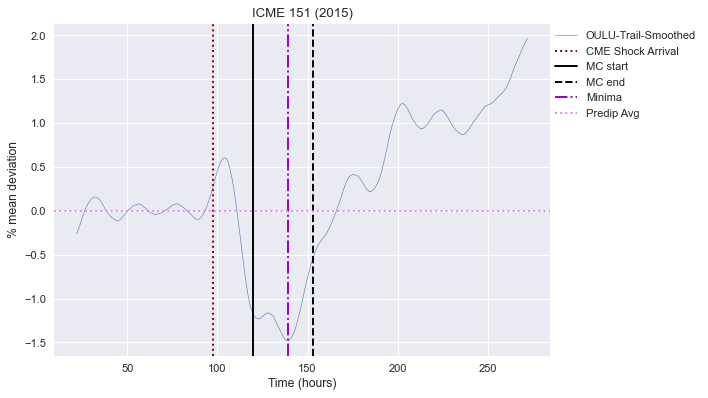

Predip_avg =  0.004314610275326884
Local minima =  -1.4795890918844525
FD magnitude =  1.4839037021597794
Location of minima =  (139,)


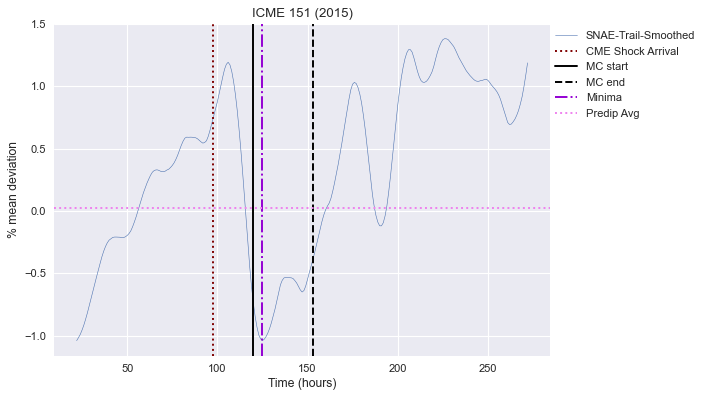

Predip_avg =  0.024359764507271377
Local minima =  -1.0399987257151766
FD magnitude =  1.0643584902224479
Location of minima =  (125,)


In [53]:
analyze14("lowrigall_151.txt", "OULU", 12, "Percentdev_smooth", "ICME 151 (2015)", 97.58, 119.67, 153.03)
analyze14("lowrigall_151.txt", "SNAE", 12, "Percentdev_smooth", "ICME 151 (2015)", 97.58, 119.67, 153.03)